In [1]:
import codigo
from codigo import utils
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pickle import dump

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importar Dataset depurado

In [3]:
df_Inicial = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

# Revisamos las columnas que contiene el Dataset

In [4]:
df_Inicial.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0


In [5]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 67.9+ MB


### Cambiamos el formato de la columna Date de object a datetime64

In [6]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [7]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.9+ MB


In [8]:
df_Inicial['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [9]:
df_Inicial['Date'].max()

Timestamp('2022-03-20 23:58:00')

# Seleccionar los pacientes para evaluación

In [10]:
dfPacienteCount= pd.DataFrame(df_Inicial.ID.value_counts().sort_values(ascending=False))
dfPacienteCount.columns = ['Freq']
dfPacienteCount

,Freq
LIB193277,114563
LIB193385,112924
LIB193307,104043
LIB193309,77285
LIB193367,76611
...,...
LIB193366,1287
LIB193398,1253
LIB193283,1098
LIB193365,1057


In [11]:
pacientesNoDeseados=['LIB193321']
dfPacienteCount=dfPacienteCount[~dfPacienteCount.index.isin(pacientesNoDeseados)]

In [12]:
dfPacienteCount

,Freq
LIB193277,114563
LIB193385,112924
LIB193307,104043
LIB193309,77285
LIB193367,76611
...,...
LIB193282,1808
LIB193366,1287
LIB193398,1253
LIB193283,1098


<AxesSubplot: >

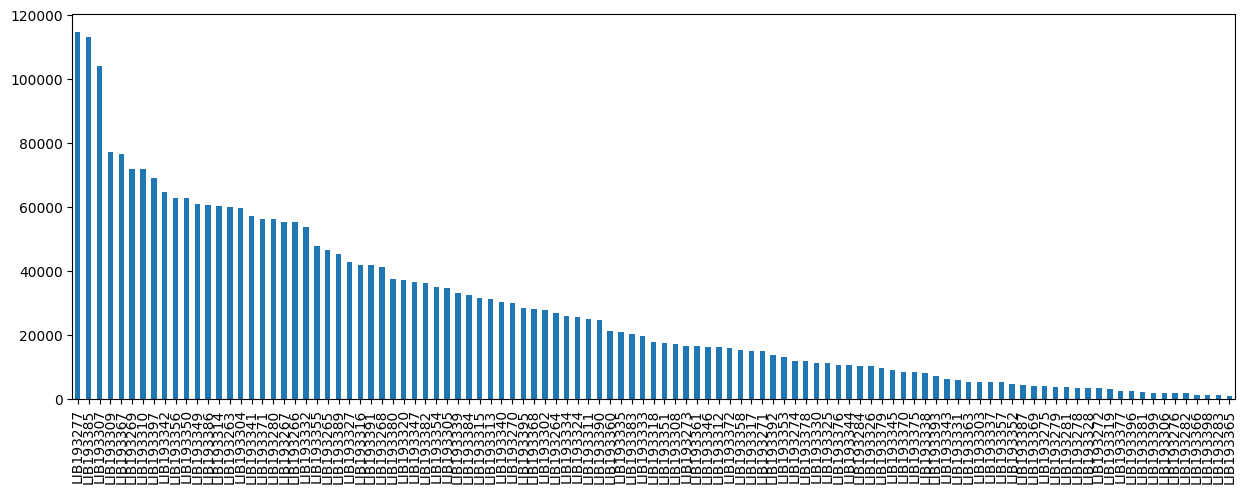

In [13]:
dfPacienteCount['Freq'].plot.bar(figsize=(15, 5))

In [14]:
dfPacienteCount.describe()

,Freq
count,107.000000
mean,27726.009346
std,25694.131765
min,1057.000000
25%,6717.000000
50%,17889.000000
75%,41868.000000
max,114563.000000


In [15]:
train_share = 1
val_share = 0
lag=30
n_ahead=1
formato='%Y-%m-%d %H:%M:%S'
min=15

strMin=str(min)+'min'

In [16]:
features=['Glucose level','hour','min','pod_id','level_id','level_label']
featuresObj=['Glucose level','hour','min','pod_id','level_id']

In [17]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

C:\Users\wm_herrera\Anaconda3\envs\tensorflow_keras\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Pacientes del Q1

In [18]:
dfPacienteCount[dfPacienteCount['Freq'].between(0, 6717)]

,Freq
LIB193343,6323
LIB193331,6026
LIB193363,5362
LIB193303,5283
LIB193337,5187
LIB193357,5169
LIB193352,4775
LIB193387,4490
LIB193369,4170
LIB193275,4095


'LIB193399' tiene 1913 muestras

In [19]:
ID_Paciente=pq1='LIB193399'


diasP1=[]
especialesP1=[]

In [20]:
dfpaciente=df_Inicial[df_Inicial['ID'] == ID_Paciente]

In [21]:
dfpaciente

,ID,Date,Glucose level
2964772,LIB193399,2020-09-30 18:15:00,105.0
2964773,LIB193399,2020-09-30 18:30:00,101.0
2964774,LIB193399,2020-09-30 18:45:00,98.0
2964775,LIB193399,2020-09-30 19:00:00,99.0
2964776,LIB193399,2020-09-30 19:15:00,108.0
...,...,...,...
2966680,LIB193399,2020-10-20 20:50:00,83.0
2966681,LIB193399,2020-10-20 21:05:00,76.0
2966682,LIB193399,2020-10-20 21:20:00,67.0
2966683,LIB193399,2020-10-20 21:35:00,63.0


In [22]:
dfGenPaciente,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,features,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=False)
dfGenPacienteScaled,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,featuresObj,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=True)

In [23]:
dfGenPaciente

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-09-30 18:15:00,105.0,18,15,4,0,euglycemia
2020-09-30 18:30:00,101.0,18,30,4,0,euglycemia
2020-09-30 18:45:00,98.0,18,45,4,0,euglycemia
2020-09-30 19:00:00,99.0,19,0,4,0,euglycemia
2020-09-30 19:15:00,108.0,19,15,4,0,euglycemia
...,...,...,...,...,...,...
2020-10-20 20:45:00,83.0,20,45,4,0,euglycemia
2020-10-20 21:00:00,76.0,21,0,5,0,euglycemia
2020-10-20 21:15:00,67.0,21,15,5,-1,hypoglycemia


In [24]:
dfGenPacienteScaled

,Glucose level,hour,min,pod_id,level_id
Date,,,,,
2020-09-30 18:15:00,0.141304,0.782609,0.254237,0.6,0.5
2020-09-30 18:30:00,0.132609,0.782609,0.508475,0.6,0.5
2020-09-30 18:45:00,0.126087,0.782609,0.762712,0.6,0.5
2020-09-30 19:00:00,0.128261,0.826087,0.000000,0.6,0.5
2020-09-30 19:15:00,0.147826,0.826087,0.254237,0.6,0.5
...,...,...,...,...,...
2020-10-20 20:45:00,0.093478,0.869565,0.762712,0.6,0.5
2020-10-20 21:00:00,0.078261,0.913043,0.000000,0.8,0.5
2020-10-20 21:15:00,0.058696,0.913043,0.254237,0.8,0.0


### Análisis del Paciente 1: ID: LIB193399

<AxesSubplot: ylabel='level_label'>

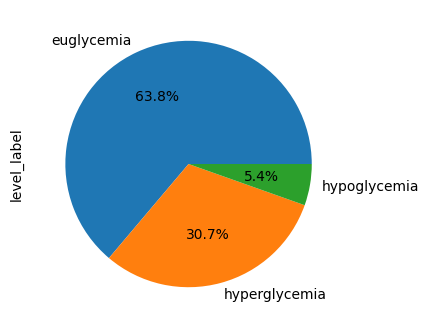

In [25]:
dfGenPaciente['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

### Selección del Dia 1 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-10-15 20:30:00
Rango Inicio Objetivo: 2020-10-16 04:00:00
Rango Fin Objetivo   : 2020-10-16 23:59:59


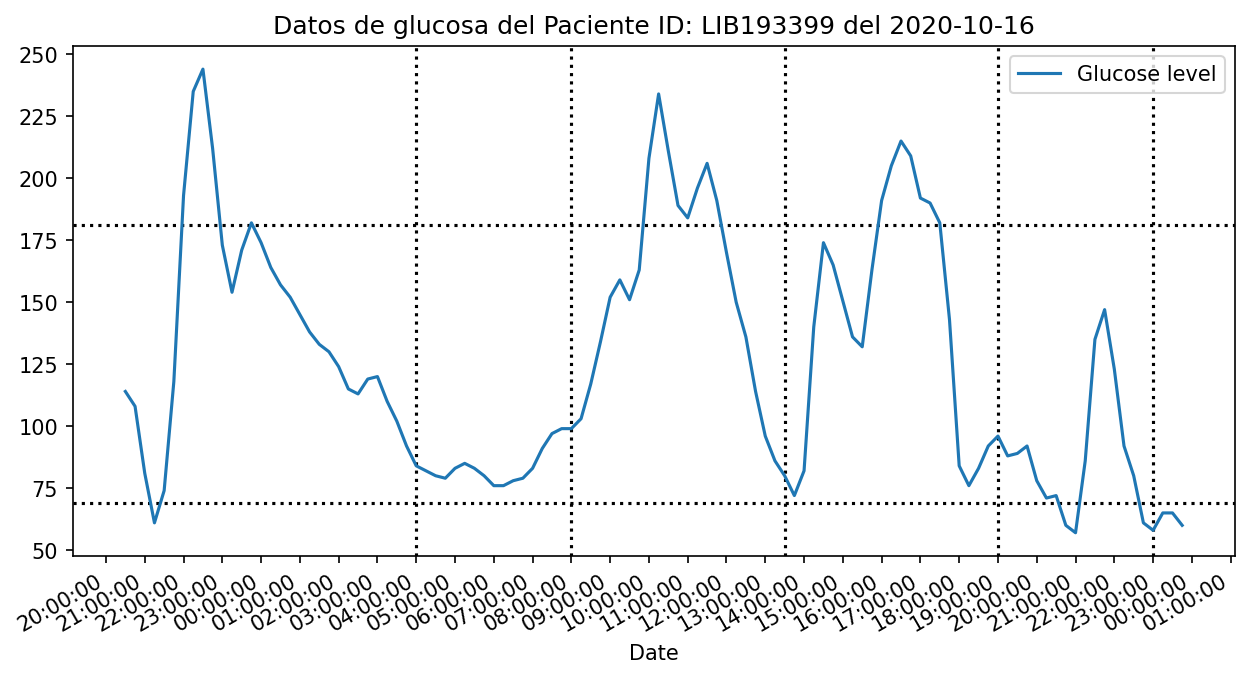

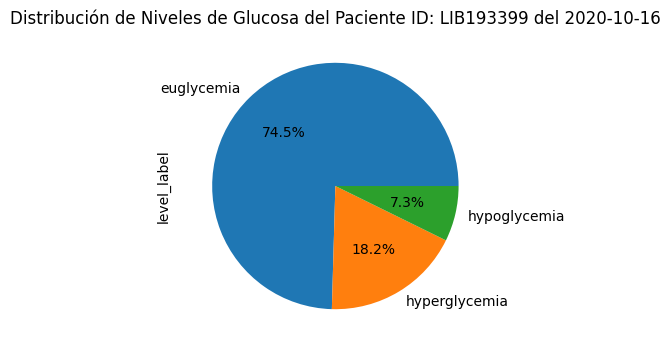

In [26]:
dateObj='2020-10-16'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP1_d1=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [27]:
df_rango.loc[dateObj+' 17:00:00':dateObj+' 18:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-10-16 17:00:00,192.0,17,0,4,1,hyperglycemia
2020-10-16 17:15:00,190.0,17,15,4,1,hyperglycemia
2020-10-16 17:30:00,182.0,17,30,4,1,hyperglycemia
2020-10-16 17:45:00,143.0,17,45,4,0,euglycemia
2020-10-16 18:00:00,84.0,18,0,4,0,euglycemia


In [28]:
especialesP1.append('2020-10-16 17:45:00')

### Selección del Dia 2 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-10-02 20:30:00
Rango Inicio Objetivo: 2020-10-3 04:00:00
Rango Fin Objetivo   : 2020-10-3 23:59:59


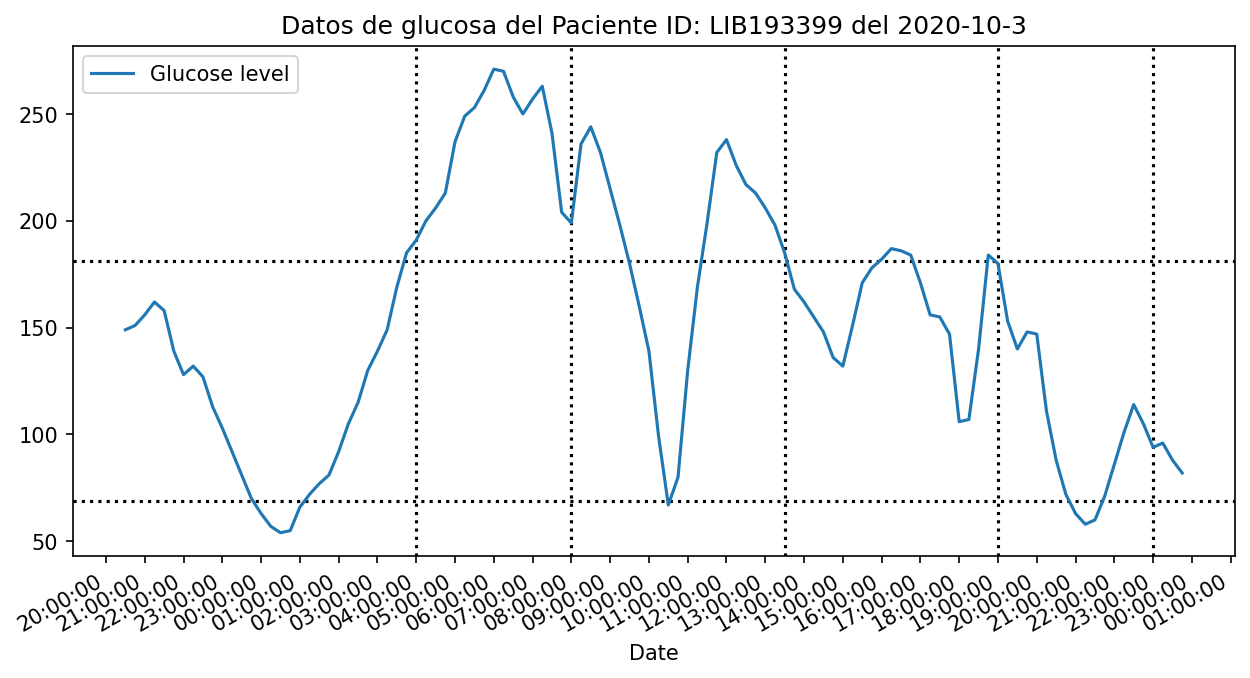

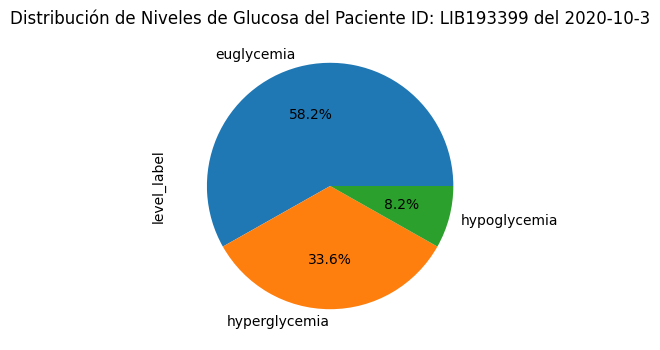

In [29]:
dateObj='2020-10-3'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP1_d2=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [30]:
df_rango.loc[dateObj+' 20:00:00':dateObj+' 21:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-10-03 20:00:00,147.0,20,0,4,0,euglycemia
2020-10-03 20:15:00,111.0,20,15,4,0,euglycemia
2020-10-03 20:30:00,88.0,20,30,4,0,euglycemia
2020-10-03 20:45:00,72.0,20,45,4,0,euglycemia
2020-10-03 21:00:00,63.0,21,0,5,-1,hypoglycemia


In [31]:
especialesP1.append('2020-10-03 21:00:00')

### Selección del Dia 3 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-10-09 20:30:00
Rango Inicio Objetivo: 2020-10-10 04:00:00
Rango Fin Objetivo   : 2020-10-10 23:59:59


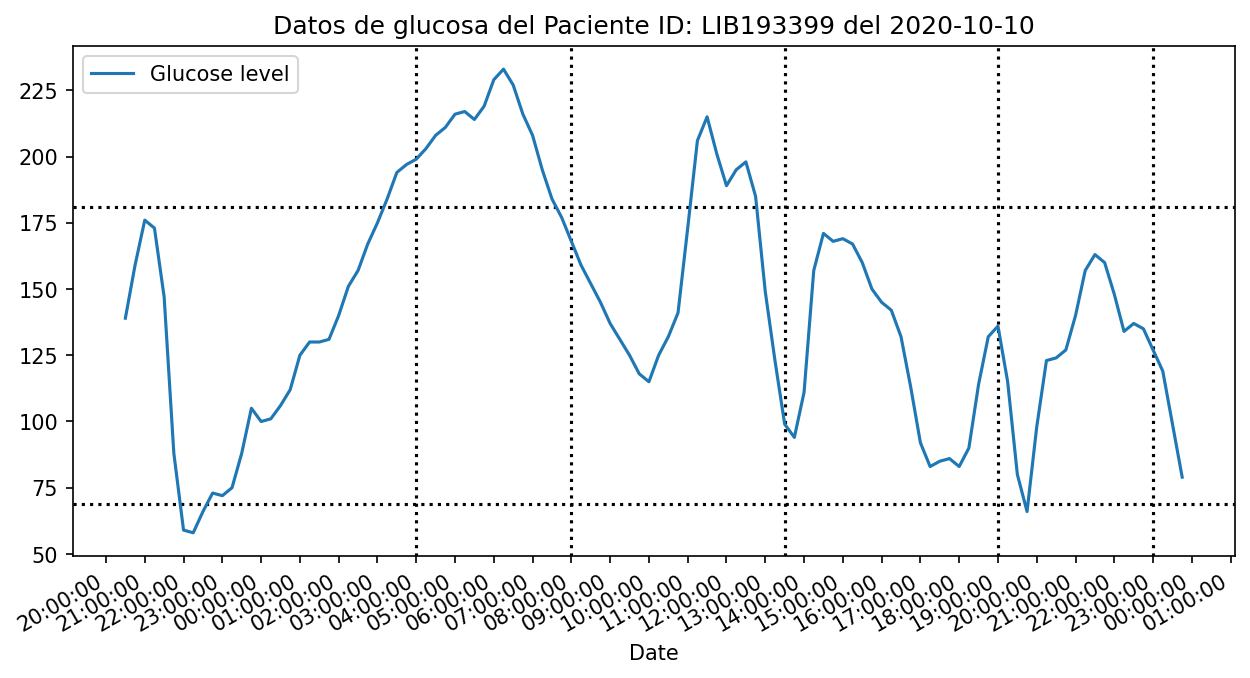

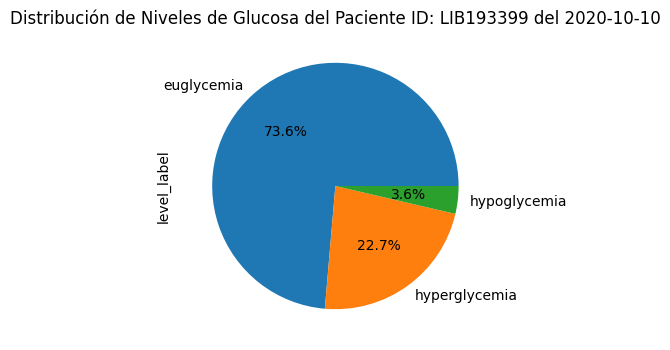

In [32]:
dateObj='2020-10-10'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP1_d3=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [33]:
df_rango.loc[dateObj+' 19:00:00':dateObj+' 20:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-10-10 19:00:00,136.0,19,0,4,0,euglycemia
2020-10-10 19:15:00,115.0,19,15,4,0,euglycemia
2020-10-10 19:30:00,80.0,19,30,4,0,euglycemia
2020-10-10 19:45:00,66.0,19,45,4,-1,hypoglycemia
2020-10-10 20:00:00,98.0,20,0,4,0,euglycemia


In [34]:
especialesP1.append('2020-10-10 19:45:00')

### Selección del Dia 4 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-10-11 20:30:00
Rango Inicio Objetivo: 2020-10-12 04:00:00
Rango Fin Objetivo   : 2020-10-12 23:59:59


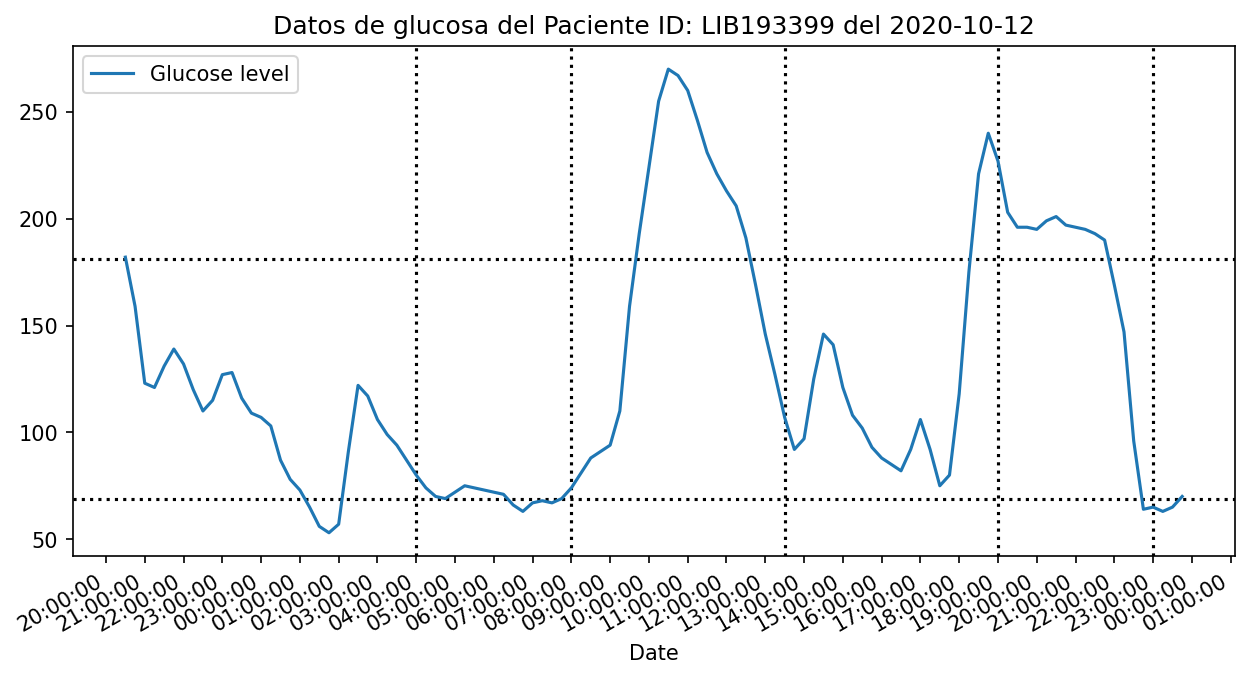

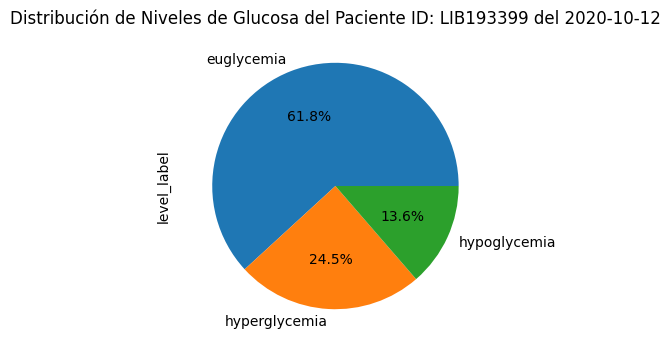

In [35]:
dateObj='2020-10-12'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP1_d4=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [36]:
df_rango.loc[dateObj+' 06:00:00':dateObj+' 07:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-10-12 06:00:00,72.0,6,0,1,0,euglycemia
2020-10-12 06:15:00,71.0,6,15,1,0,euglycemia
2020-10-12 06:30:00,66.0,6,30,1,-1,hypoglycemia
2020-10-12 06:45:00,63.0,6,45,1,-1,hypoglycemia
2020-10-12 07:00:00,67.0,7,0,1,-1,hypoglycemia


In [37]:
especialesP1.append('2020-10-12 06:30:00')

In [38]:
diasP1

['2020-10-16', '2020-10-3', '2020-10-10', '2020-10-12']

In [39]:
especialesP1

['2020-10-16 17:45:00',
 '2020-10-03 21:00:00',
 '2020-10-10 19:45:00',
 '2020-10-12 06:30:00']

## Pacientes del Q2

In [40]:
dfPacienteCount[dfPacienteCount['Freq'].between(6717,17889)]

,Freq
LIB193318,17889
LIB193351,17599
LIB193308,17178
LIB193273,16575
LIB193361,16448
LIB193346,16213
LIB193312,16155
LIB193372,15782
LIB193358,15146
LIB193317,14896


'LIB193271' tiene 14859 muestras

In [41]:
ID_Paciente=pq2='LIB193271'


diasP2=[]
especialesP2=[]

In [42]:
dfpaciente=df_Inicial[df_Inicial['ID'] == ID_Paciente]

In [43]:
dfpaciente

,ID,Date,Glucose level
386964,LIB193271,2020-09-24 17:59:00,125.0
386965,LIB193271,2020-09-24 18:14:00,109.0
386966,LIB193271,2020-09-24 18:29:00,111.0
386967,LIB193271,2020-09-24 18:44:00,119.0
386968,LIB193271,2020-09-24 18:59:00,114.0
...,...,...,...
401818,LIB193271,2022-03-20 22:55:00,172.0
401819,LIB193271,2022-03-20 23:12:00,172.0
401820,LIB193271,2022-03-20 23:27:00,179.0
401821,LIB193271,2022-03-20 23:42:00,179.0


In [44]:
dfGenPaciente,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,features,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=False)
dfGenPacienteScaled,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,featuresObj,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=True)

In [45]:
dfGenPaciente

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-09-24 17:45:00,125.0,17,45,4,0,euglycemia
2020-09-24 18:00:00,109.0,18,0,4,0,euglycemia
2020-09-24 18:15:00,111.0,18,15,4,0,euglycemia
2020-09-24 18:30:00,119.0,18,30,4,0,euglycemia
2020-09-24 18:45:00,114.0,18,45,4,0,euglycemia
...,...,...,...,...,...,...
2022-03-20 22:45:00,172.0,22,45,5,0,euglycemia
2022-03-20 23:00:00,172.0,23,0,5,0,euglycemia
2022-03-20 23:15:00,179.0,23,15,5,0,euglycemia


In [46]:
dfGenPacienteScaled

,Glucose level,hour,min,pod_id,level_id
Date,,,,,
2020-09-24 17:45:00,0.184783,0.739130,0.762712,0.6,0.5
2020-09-24 18:00:00,0.150000,0.782609,0.000000,0.6,0.5
2020-09-24 18:15:00,0.154348,0.782609,0.254237,0.6,0.5
2020-09-24 18:30:00,0.171739,0.782609,0.508475,0.6,0.5
2020-09-24 18:45:00,0.160870,0.782609,0.762712,0.6,0.5
...,...,...,...,...,...
2022-03-20 22:45:00,0.286957,0.956522,0.762712,0.8,0.5
2022-03-20 23:00:00,0.286957,1.000000,0.000000,0.8,0.5
2022-03-20 23:15:00,0.302174,1.000000,0.254237,0.8,0.5


### Análisis del Paciente 2: ID: LIB193271

<AxesSubplot: ylabel='level_label'>

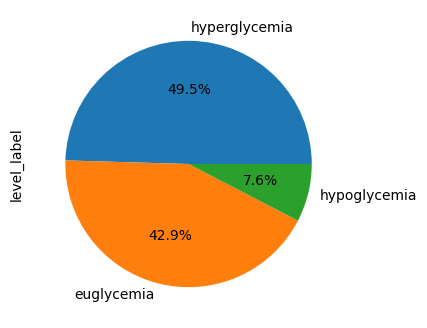

In [47]:
dfGenPaciente['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

### Selección del Dia 1 del Paciente 2: ID: LIB193271

Fecha Inicio Previo  : 2020-09-28 20:30:00
Rango Inicio Objetivo: 2020-09-29 04:00:00
Rango Fin Objetivo   : 2020-09-29 23:59:59


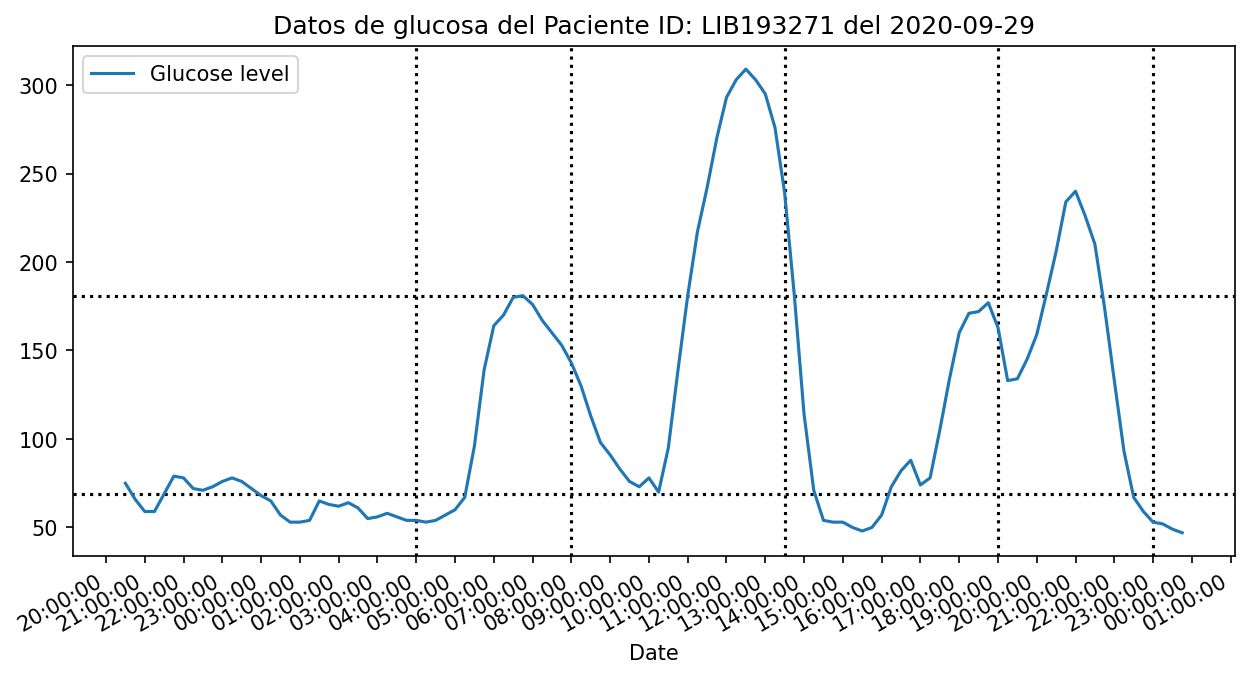

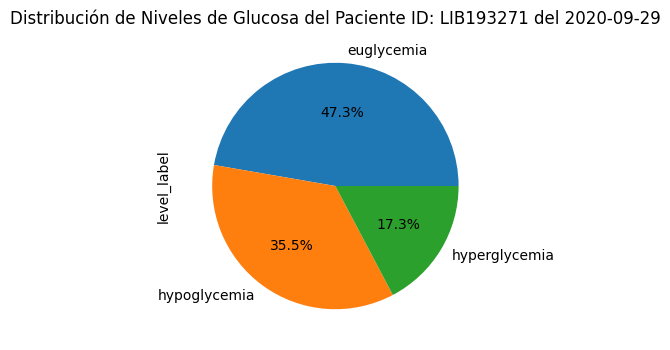

In [48]:
dateObj='2020-09-29'
diasP2.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP2_d1=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [49]:
df_rango.loc[dateObj+' 14:00:00':dateObj+' 15:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-09-29 14:00:00,114.0,14,0,3,0,euglycemia
2020-09-29 14:15:00,71.0,14,15,3,0,euglycemia
2020-09-29 14:30:00,54.0,14,30,3,-1,hypoglycemia
2020-09-29 14:45:00,53.0,14,45,3,-1,hypoglycemia
2020-09-29 15:00:00,53.0,15,0,3,-1,hypoglycemia


In [50]:
especialesP2.append('2020-09-29 14:30:00')

### Selección del Dia 2 del Paciente 2: ID: LIB193271

Fecha Inicio Previo  : 2020-10-10 20:30:00
Rango Inicio Objetivo: 2020-10-11 04:00:00
Rango Fin Objetivo   : 2020-10-11 23:59:59


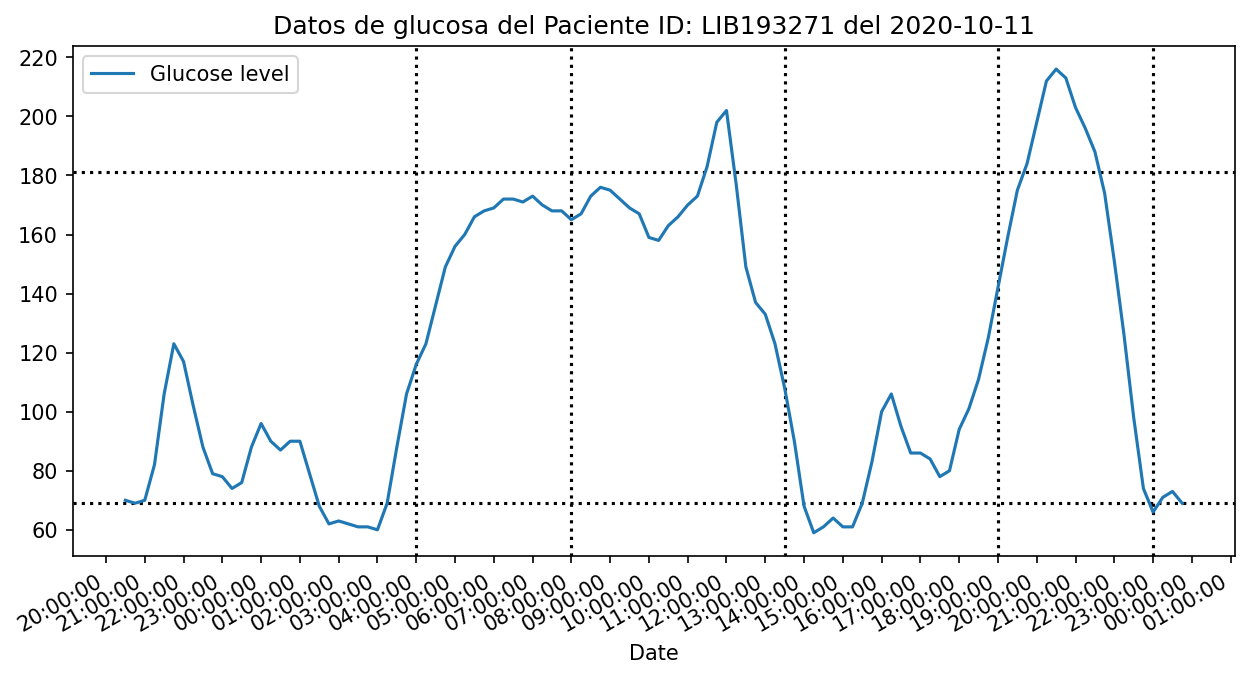

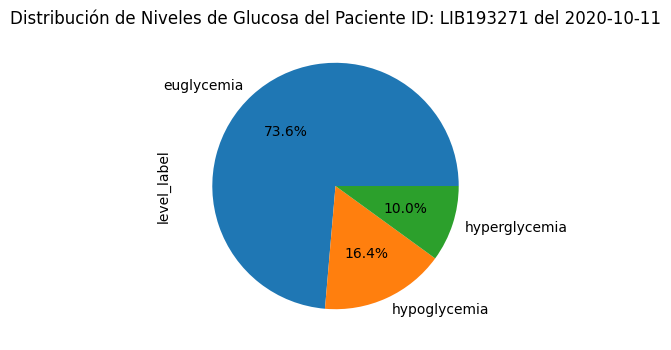

In [51]:
dateObj='2020-10-11'
diasP2.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP2_d2=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

In [52]:
dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd]

,Glucose level,hour,min,pod_id,level_id
Date,,,,,
2020-10-10 20:30:00,0.065217,0.869565,0.508475,0.6,0.5
2020-10-10 20:45:00,0.063043,0.869565,0.762712,0.6,0.0
2020-10-10 21:00:00,0.065217,0.913043,0.000000,0.8,0.5
2020-10-10 21:15:00,0.091304,0.913043,0.254237,0.8,0.5
2020-10-10 21:30:00,0.143478,0.913043,0.508475,0.8,0.5
...,...,...,...,...,...
2020-10-11 22:45:00,0.073913,0.956522,0.762712,0.8,0.5
2020-10-11 23:00:00,0.056522,1.000000,0.000000,0.8,0.0
2020-10-11 23:15:00,0.067391,1.000000,0.254237,0.8,0.5


### Agregamos eventos especiales de hipoglucemia

In [53]:
df_rango.loc[dateObj+' 13:00:00':dateObj+' 15:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-10-11 13:00:00,133.0,13,0,3,0,euglycemia
2020-10-11 13:15:00,123.0,13,15,3,0,euglycemia
2020-10-11 13:30:00,108.0,13,30,3,0,euglycemia
2020-10-11 13:45:00,90.0,13,45,3,0,euglycemia
2020-10-11 14:00:00,68.0,14,0,3,-1,hypoglycemia
2020-10-11 14:15:00,59.0,14,15,3,-1,hypoglycemia
2020-10-11 14:30:00,61.0,14,30,3,-1,hypoglycemia
2020-10-11 14:45:00,64.0,14,45,3,-1,hypoglycemia
2020-10-11 15:00:00,61.0,15,0,3,-1,hypoglycemia


In [54]:
especialesP2.append('2020-10-11 14:00:00')

### Selección del Dia 3 del Paciente 2: ID: LIB193271

Fecha Inicio Previo  : 2020-10-12 20:30:00
Rango Inicio Objetivo: 2020-10-13 04:00:00
Rango Fin Objetivo   : 2020-10-13 23:59:59


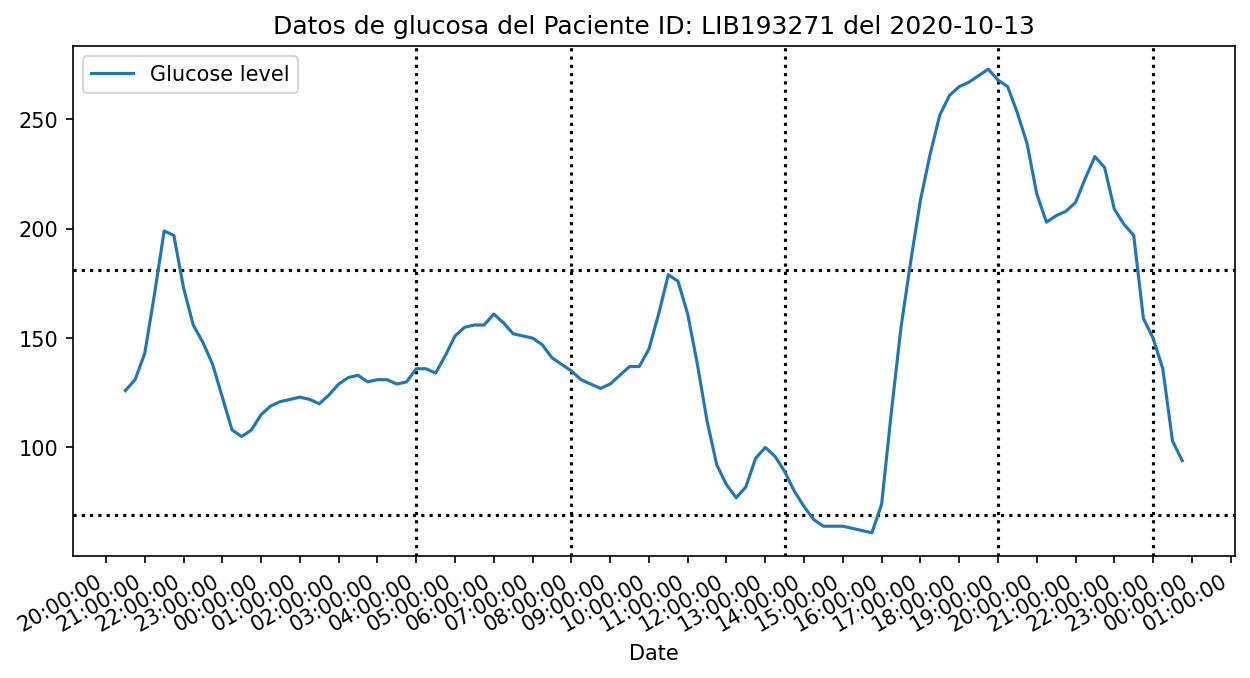

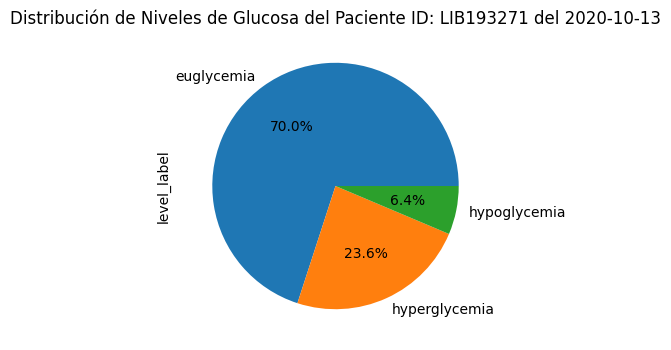

In [55]:
dateObj='2020-10-13'
diasP2.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP2_d3=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [56]:
df_rango.loc[dateObj+' 14:00:00':dateObj+' 15:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-10-13 14:00:00,73.0,14,0,3,0,euglycemia
2020-10-13 14:15:00,67.0,14,15,3,-1,hypoglycemia
2020-10-13 14:30:00,64.0,14,30,3,-1,hypoglycemia
2020-10-13 14:45:00,64.0,14,45,3,-1,hypoglycemia
2020-10-13 15:00:00,64.0,15,0,3,-1,hypoglycemia


In [57]:
especialesP2.append('2020-10-13 14:15:00')

### Selección del Dia 4 del Paciente 2: ID: LIB193271

Fecha Inicio Previo  : 2020-10-14 20:30:00
Rango Inicio Objetivo: 2020-10-15 04:00:00
Rango Fin Objetivo   : 2020-10-15 23:59:59


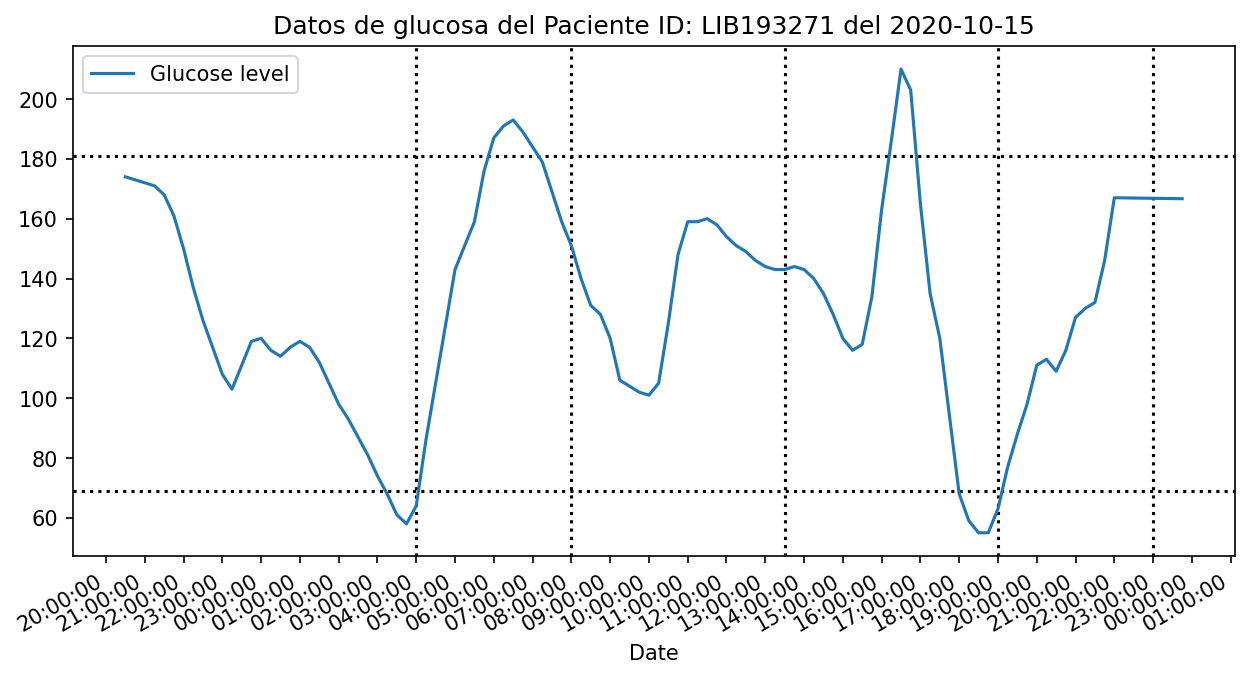

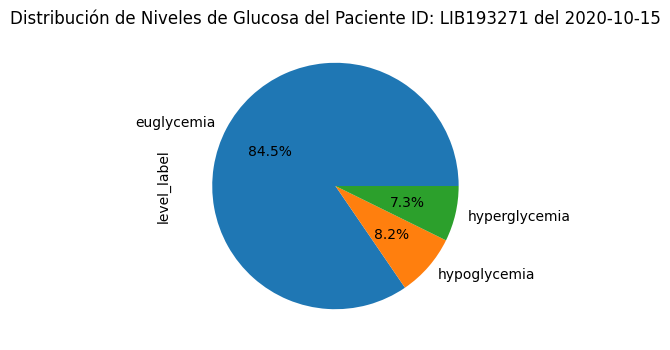

In [58]:
dateObj='2020-10-15'
diasP2.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP2_d4=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [59]:
df_rango.loc[dateObj+' 17:00:00':dateObj+' 18:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-10-15 17:00:00,165.0,17,0,4,0,euglycemia
2020-10-15 17:15:00,135.0,17,15,4,0,euglycemia
2020-10-15 17:30:00,120.0,17,30,4,0,euglycemia
2020-10-15 17:45:00,94.0,17,45,4,0,euglycemia
2020-10-15 18:00:00,68.0,18,0,4,-1,hypoglycemia


In [60]:
especialesP2.append('2020-10-15 18:00:00')

In [61]:
diasP2

['2020-09-29', '2020-10-11', '2020-10-13', '2020-10-15']

In [62]:
especialesP2

['2020-09-29 14:30:00',
 '2020-10-11 14:00:00',
 '2020-10-13 14:15:00',
 '2020-10-15 18:00:00']

## Pacientes del Q3

In [63]:
dfPacienteCount[dfPacienteCount['Freq'].between(17889,41868)]

,Freq
LIB193391,41790
LIB193268,41073
LIB193380,37553
LIB193320,37172
LIB193347,36456
LIB193382,36130
LIB193354,35086
LIB193305,34549
LIB193339,33071
LIB193384,32368


'LIB193315' tiene 31592 muestras

In [64]:
ID_Paciente=pq3='LIB193315'


diasP3=[]
especialesP3=[]

In [65]:
dfpaciente=df_Inicial[df_Inicial['ID'] == ID_Paciente]

In [66]:
dfpaciente

,ID,Date,Glucose level
1166570,LIB193315,2021-03-09 12:04:00,99.0
1166571,LIB193315,2021-03-09 12:19:00,89.0
1166572,LIB193315,2021-03-09 12:34:00,80.0
1166573,LIB193315,2021-03-09 12:49:00,87.0
1166574,LIB193315,2021-03-09 13:05:00,102.0
...,...,...,...
1198157,LIB193315,2022-03-18 06:11:00,188.0
1198158,LIB193315,2022-03-18 06:26:00,182.0
1198159,LIB193315,2022-03-18 06:41:00,171.0
1198160,LIB193315,2022-03-18 06:56:00,167.0


In [67]:
dfGenPaciente,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,features,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=False)
dfGenPacienteScaled,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,featuresObj,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=True)

In [68]:
dfGenPaciente

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2021-03-09 12:00:00,99.0,12,0,2,0,euglycemia
2021-03-09 12:15:00,89.0,12,15,2,0,euglycemia
2021-03-09 12:30:00,80.0,12,30,2,0,euglycemia
2021-03-09 12:45:00,87.0,12,45,2,0,euglycemia
2021-03-09 13:00:00,102.0,13,0,3,0,euglycemia
...,...,...,...,...,...,...
2022-03-18 06:00:00,188.0,6,0,1,1,hyperglycemia
2022-03-18 06:15:00,182.0,6,15,1,1,hyperglycemia
2022-03-18 06:30:00,171.0,6,30,1,0,euglycemia


In [69]:
dfGenPacienteScaled

,Glucose level,hour,min,pod_id,level_id
Date,,,,,
2021-03-09 12:00:00,0.128261,0.521739,0.000000,0.2,0.5
2021-03-09 12:15:00,0.106522,0.521739,0.254237,0.2,0.5
2021-03-09 12:30:00,0.086957,0.521739,0.508475,0.2,0.5
2021-03-09 12:45:00,0.102174,0.521739,0.762712,0.2,0.5
2021-03-09 13:00:00,0.134783,0.565217,0.000000,0.4,0.5
...,...,...,...,...,...
2022-03-18 06:00:00,0.321739,0.260870,0.000000,0.0,1.0
2022-03-18 06:15:00,0.308696,0.260870,0.254237,0.0,1.0
2022-03-18 06:30:00,0.284783,0.260870,0.508475,0.0,0.5


### Análisis del Paciente 3: ID: LIB193315

<AxesSubplot: ylabel='level_label'>

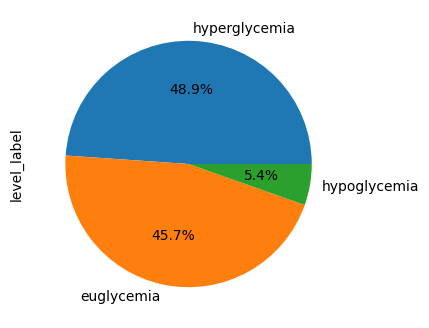

In [70]:
dfGenPaciente['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

### Selección del Dia 1 del Paciente 3: ID: LIB193315

Fecha Inicio Previo  : 2021-03-11 20:30:00
Rango Inicio Objetivo: 2021-03-12 04:00:00
Rango Fin Objetivo   : 2021-03-12 23:59:59


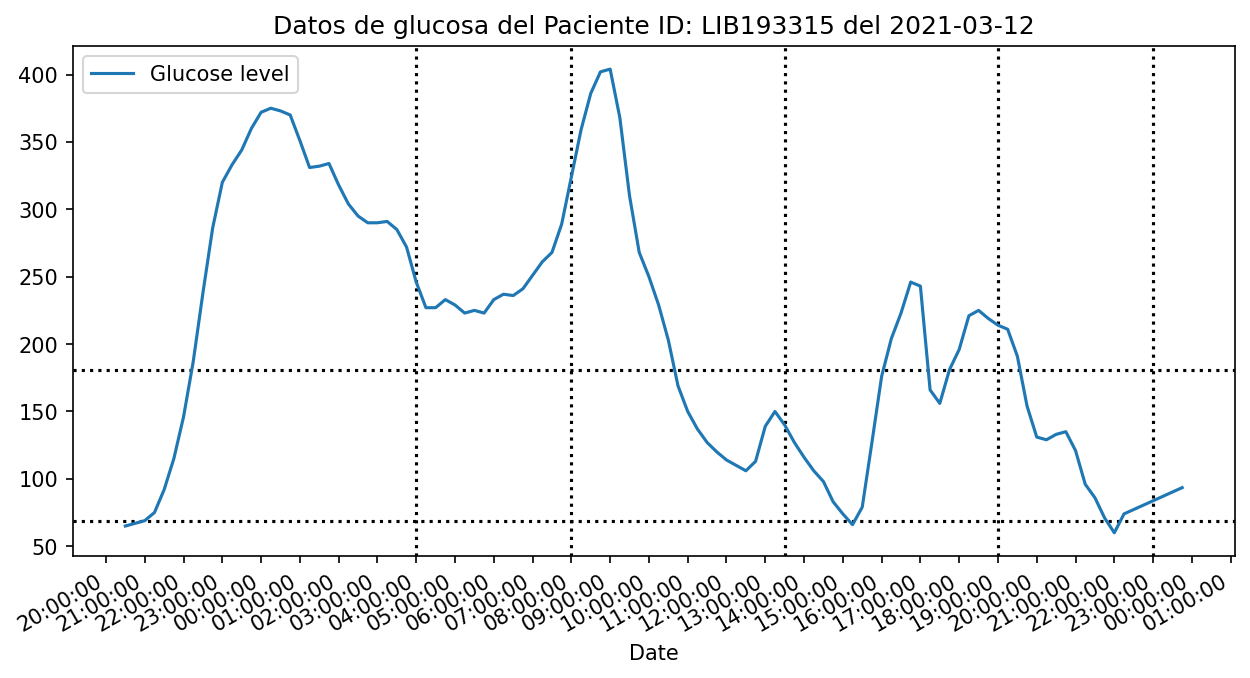

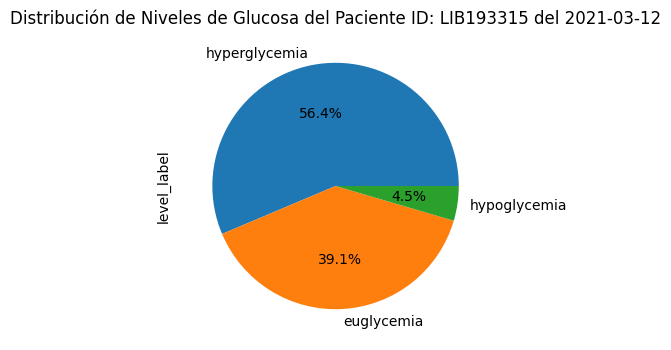

In [71]:
#dateObj='2021-03-13'
dateObj='2021-03-12'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP3_d1=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [72]:
df_rango.loc[dateObj+' 21:00:00':dateObj+' 22:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2021-03-12 21:00:00,121.0,21,0,5,0,euglycemia
2021-03-12 21:15:00,96.0,21,15,5,0,euglycemia
2021-03-12 21:30:00,86.0,21,30,5,0,euglycemia
2021-03-12 21:45:00,71.0,21,45,5,0,euglycemia
2021-03-12 22:00:00,60.0,22,0,5,-1,hypoglycemia


In [73]:
especialesP3.append('2021-03-12 22:00:00')

### Selección del Dia 2 del Paciente 3: ID: LIB193315

Fecha Inicio Previo  : 2021-05-19 20:30:00
Rango Inicio Objetivo: 2021-05-20 04:00:00
Rango Fin Objetivo   : 2021-05-20 23:59:59


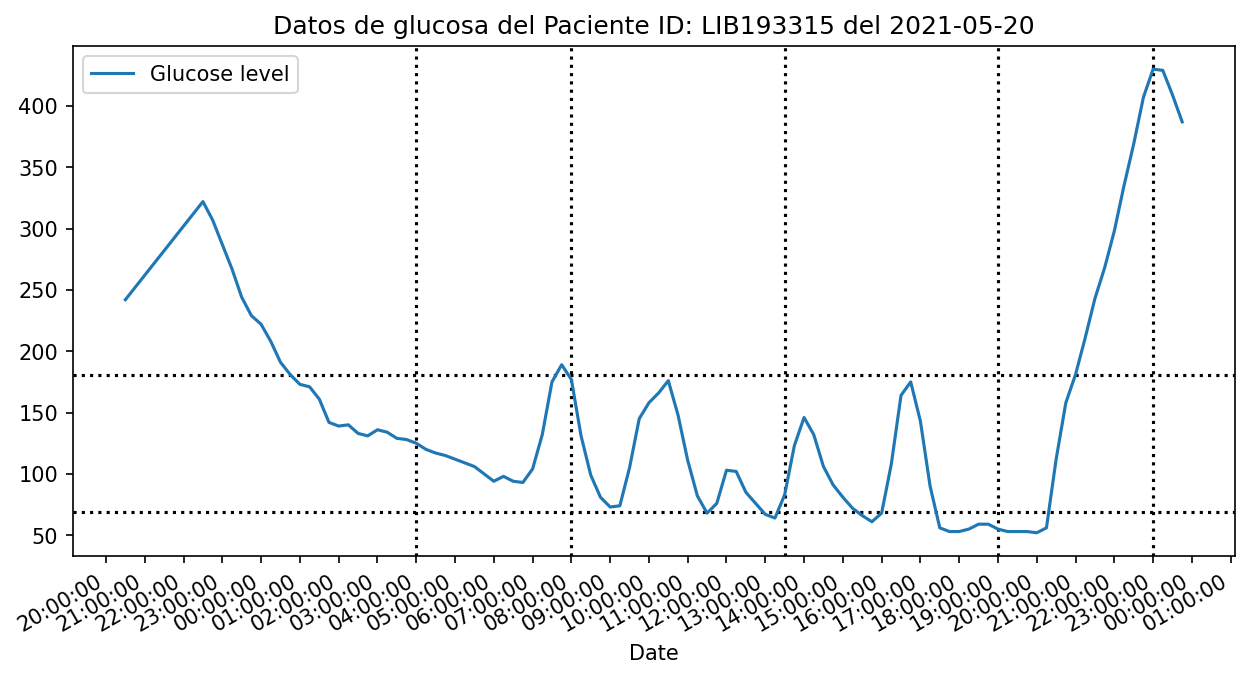

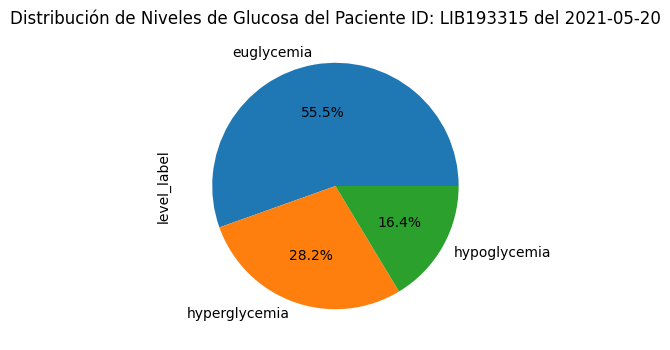

In [74]:
dateObj='2021-05-20'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP3_d2=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [75]:
df_rango.loc[dateObj+' 12:00:00':dateObj+' 13:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2021-05-20 12:00:00,103.0,12,0,2,0,euglycemia
2021-05-20 12:15:00,102.0,12,15,2,0,euglycemia
2021-05-20 12:30:00,85.0,12,30,2,0,euglycemia
2021-05-20 12:45:00,76.0,12,45,2,0,euglycemia
2021-05-20 13:00:00,67.0,13,0,3,-1,hypoglycemia


In [76]:
especialesP3.append('2021-05-20 13:00:00')

### Selección del Dia 3 del Paciente 3: ID: LIB193315

Fecha Inicio Previo  : 2021-03-13 20:30:00
Rango Inicio Objetivo: 2021-03-14 04:00:00
Rango Fin Objetivo   : 2021-03-14 23:59:59


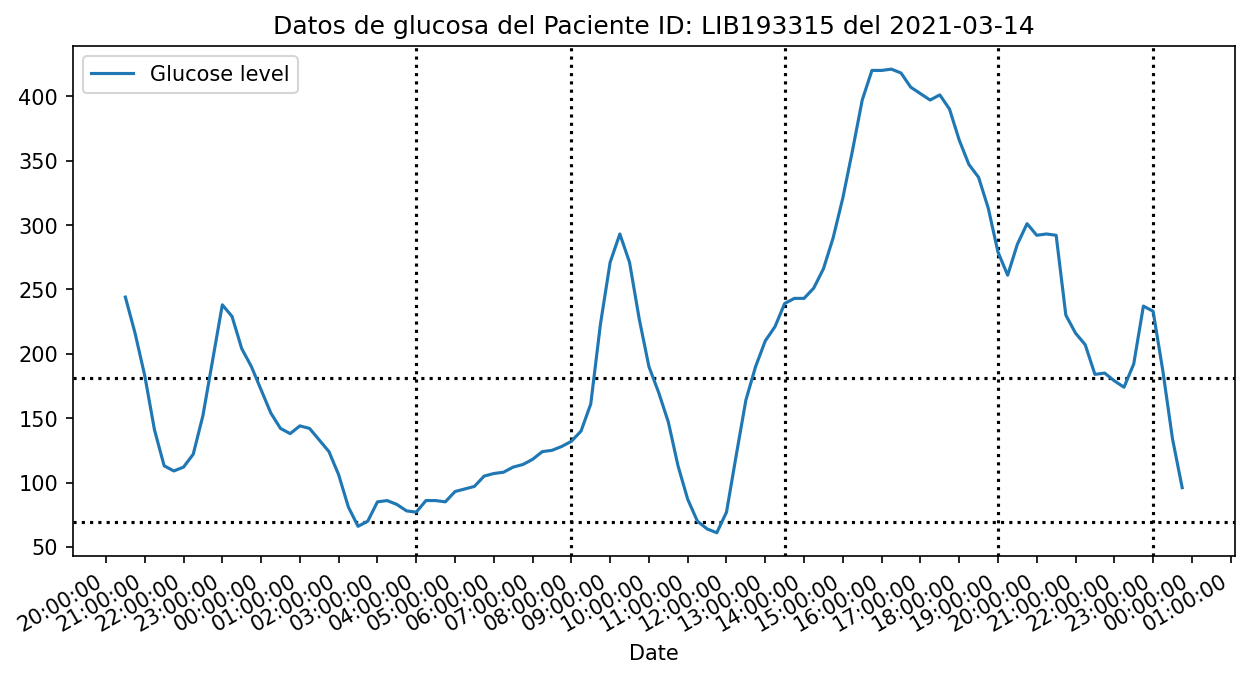

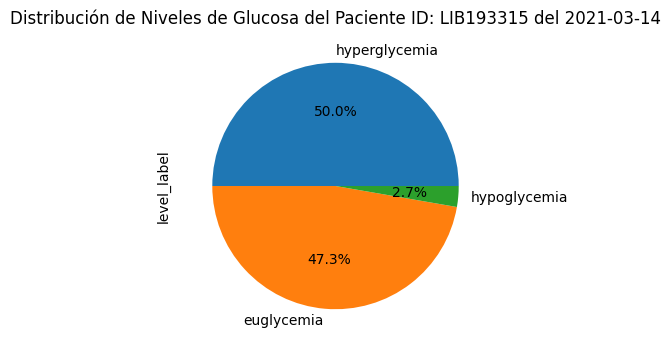

In [77]:
dateObj='2021-03-14'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP3_d3=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [78]:
df_rango.loc[dateObj+' 11:00:00':dateObj+' 12:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2021-03-14 11:00:00,87.0,11,0,2,0,euglycemia
2021-03-14 11:15:00,70.0,11,15,2,0,euglycemia
2021-03-14 11:30:00,64.0,11,30,2,-1,hypoglycemia
2021-03-14 11:45:00,61.0,11,45,2,-1,hypoglycemia
2021-03-14 12:00:00,77.0,12,0,2,0,euglycemia


In [79]:
especialesP3.append('2021-03-14 11:30:00')

### Selección del Dia 4 del Paciente 3: ID: LIB193315

Fecha Inicio Previo  : 2021-03-19 20:30:00
Rango Inicio Objetivo: 2021-03-20 04:00:00
Rango Fin Objetivo   : 2021-03-20 23:59:59


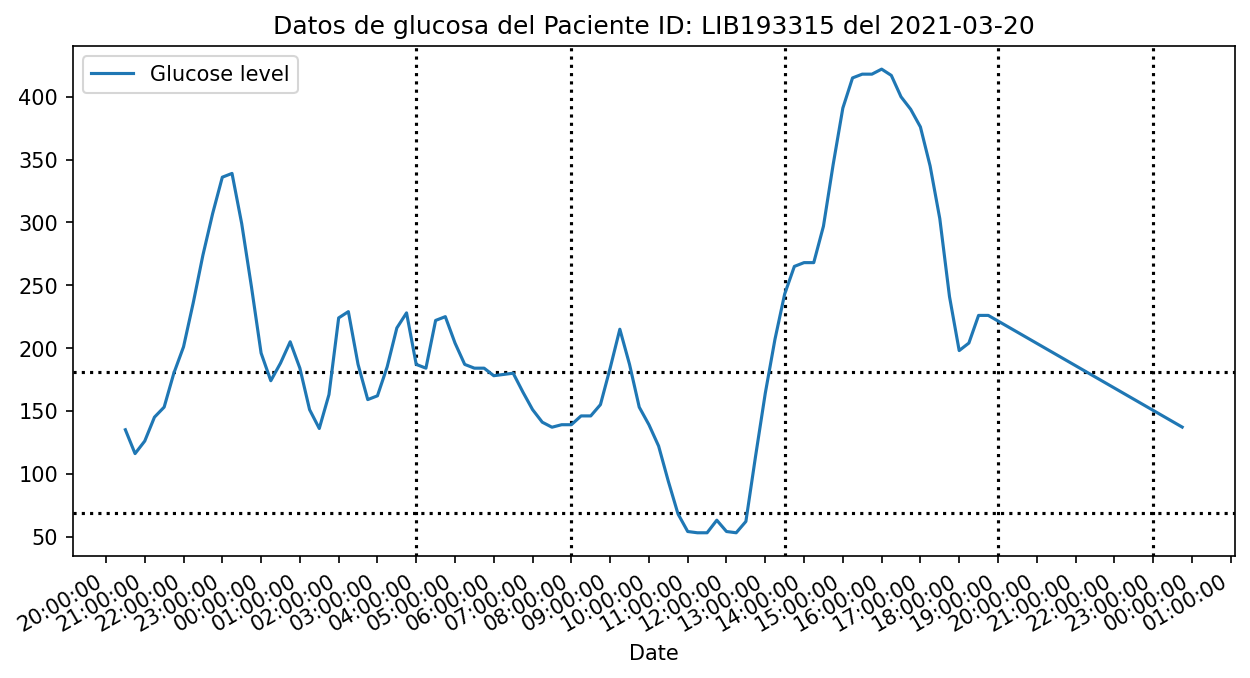

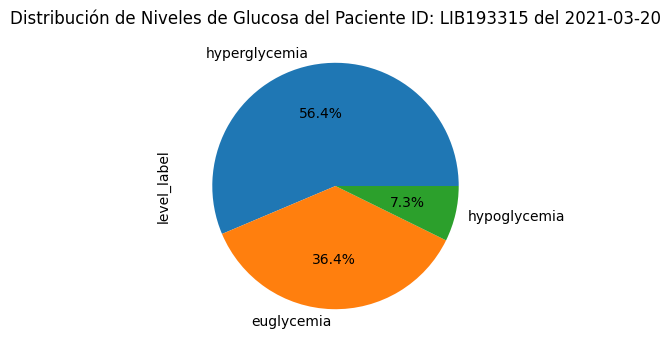

In [80]:
dateObj='2021-03-20'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP3_d4=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [81]:
df_rango.loc[dateObj+' 10:00:00':dateObj+' 11:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2021-03-20 10:00:00,139.0,10,0,2,0,euglycemia
2021-03-20 10:15:00,122.0,10,15,2,0,euglycemia
2021-03-20 10:30:00,94.0,10,30,2,0,euglycemia
2021-03-20 10:45:00,68.0,10,45,2,-1,hypoglycemia
2021-03-20 11:00:00,54.0,11,0,2,-1,hypoglycemia


In [82]:
especialesP3.append('2021-03-20 10:45:00')

In [83]:
diasP3

['2021-03-12', '2021-05-20', '2021-03-14', '2021-03-20']

In [84]:
especialesP3

['2021-03-12 22:00:00',
 '2021-05-20 13:00:00',
 '2021-03-14 11:30:00',
 '2021-03-20 10:45:00']

## Pacientes del Q4

In [85]:
dfPacienteCount[dfPacienteCount['Freq']>41868]

,Freq
LIB193277,114563
LIB193385,112924
LIB193307,104043
LIB193309,77285
LIB193367,76611
LIB193269,71853
LIB193310,71764
LIB193397,68945
LIB193342,64666
LIB193356,62847


'LIB193304' tiene 59786 muestras

In [86]:
ID_Paciente=pq4='LIB193304'


diasP4=[]
especialesP4=[]

In [87]:
dfpaciente=df_Inicial[df_Inicial['ID'] == ID_Paciente]

In [88]:
dfpaciente

,ID,Date,Glucose level
667394,LIB193304,2020-06-10 17:59:00,192.0
667395,LIB193304,2020-06-10 18:14:00,187.0
667396,LIB193304,2020-06-10 18:29:00,178.0
667397,LIB193304,2020-06-10 18:44:00,170.0
667398,LIB193304,2020-06-10 19:00:00,153.0
...,...,...,...
727175,LIB193304,2022-03-18 22:23:00,100.0
727176,LIB193304,2022-03-18 22:38:00,89.0
727177,LIB193304,2022-03-18 22:53:00,92.0
727178,LIB193304,2022-03-18 23:08:00,106.0


In [89]:
dfGenPaciente,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,features,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=False)
dfGenPacienteScaled,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfpaciente,featuresObj,[ID_Paciente],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True,normalized=True)

In [90]:
dfGenPaciente

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-06-10 17:45:00,192.0,17,45,4,1,hyperglycemia
2020-06-10 18:00:00,187.0,18,0,4,1,hyperglycemia
2020-06-10 18:15:00,178.0,18,15,4,0,euglycemia
2020-06-10 18:30:00,170.0,18,30,4,0,euglycemia
2020-06-10 18:45:00,161.5,18,45,4,0,euglycemia
...,...,...,...,...,...,...
2022-03-18 22:15:00,100.0,22,15,5,0,euglycemia
2022-03-18 22:30:00,89.0,22,30,5,0,euglycemia
2022-03-18 22:45:00,92.0,22,45,5,0,euglycemia


In [91]:
dfGenPacienteScaled

,Glucose level,hour,min,pod_id,level_id
Date,,,,,
2020-06-10 17:45:00,0.330435,0.739130,0.762712,0.6,1.0
2020-06-10 18:00:00,0.319565,0.782609,0.000000,0.6,1.0
2020-06-10 18:15:00,0.300000,0.782609,0.254237,0.6,0.5
2020-06-10 18:30:00,0.282609,0.782609,0.508475,0.6,0.5
2020-06-10 18:45:00,0.264130,0.782609,0.762712,0.6,0.5
...,...,...,...,...,...
2022-03-18 22:15:00,0.130435,0.956522,0.254237,0.8,0.5
2022-03-18 22:30:00,0.106522,0.956522,0.508475,0.8,0.5
2022-03-18 22:45:00,0.113043,0.956522,0.762712,0.8,0.5


### Análisis del Paciente 4: ID: LIB193341

<AxesSubplot: ylabel='level_label'>

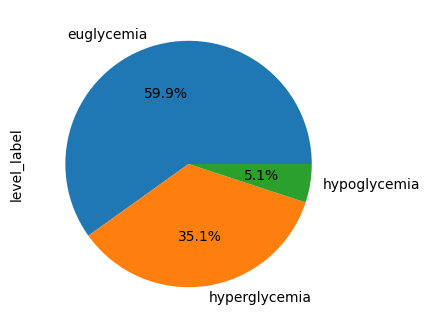

In [92]:
dfGenPaciente['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

### Selección del Dia 1 del Paciente 4: ID: LIB193304

Fecha Inicio Previo  : 2020-06-15 20:30:00
Rango Inicio Objetivo: 2020-06-16 04:00:00
Rango Fin Objetivo   : 2020-06-16 23:59:59


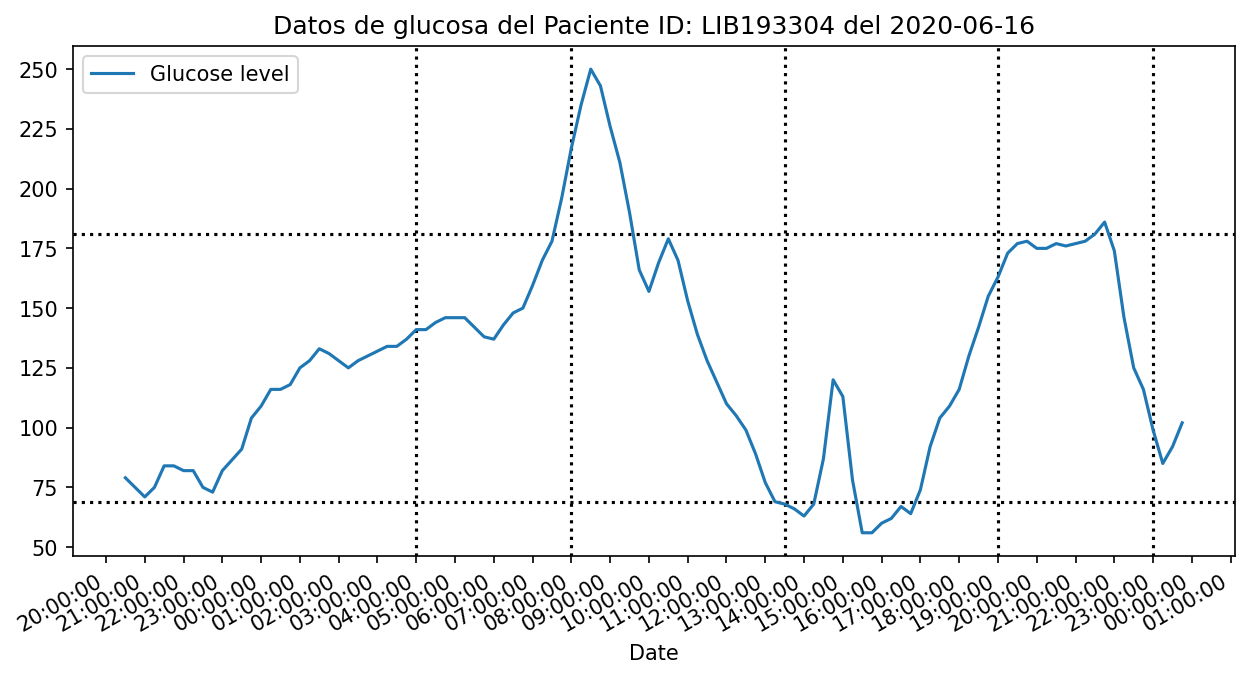

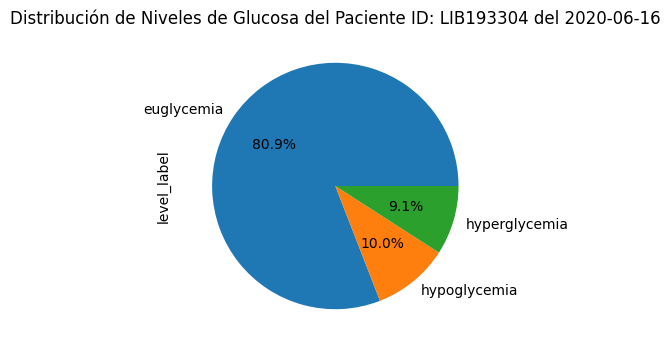

In [93]:
dateObj='2020-06-16'
diasP4.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP4_d1=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [94]:
df_rango.loc[dateObj+' 15:00:00':dateObj+' 16:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-06-16 15:00:00,113.0,15,0,3,0,euglycemia
2020-06-16 15:15:00,78.0,15,15,3,0,euglycemia
2020-06-16 15:30:00,56.0,15,30,3,-1,hypoglycemia
2020-06-16 15:45:00,56.0,15,45,3,-1,hypoglycemia
2020-06-16 16:00:00,60.0,16,0,3,-1,hypoglycemia


In [95]:
especialesP4.append('2020-06-16 15:30:00')

### Selección del Dia 2 del Paciente 4: ID: LIB193304

Fecha Inicio Previo  : 2020-07-02 20:30:00
Rango Inicio Objetivo: 2020-07-03 04:00:00
Rango Fin Objetivo   : 2020-07-03 23:59:59


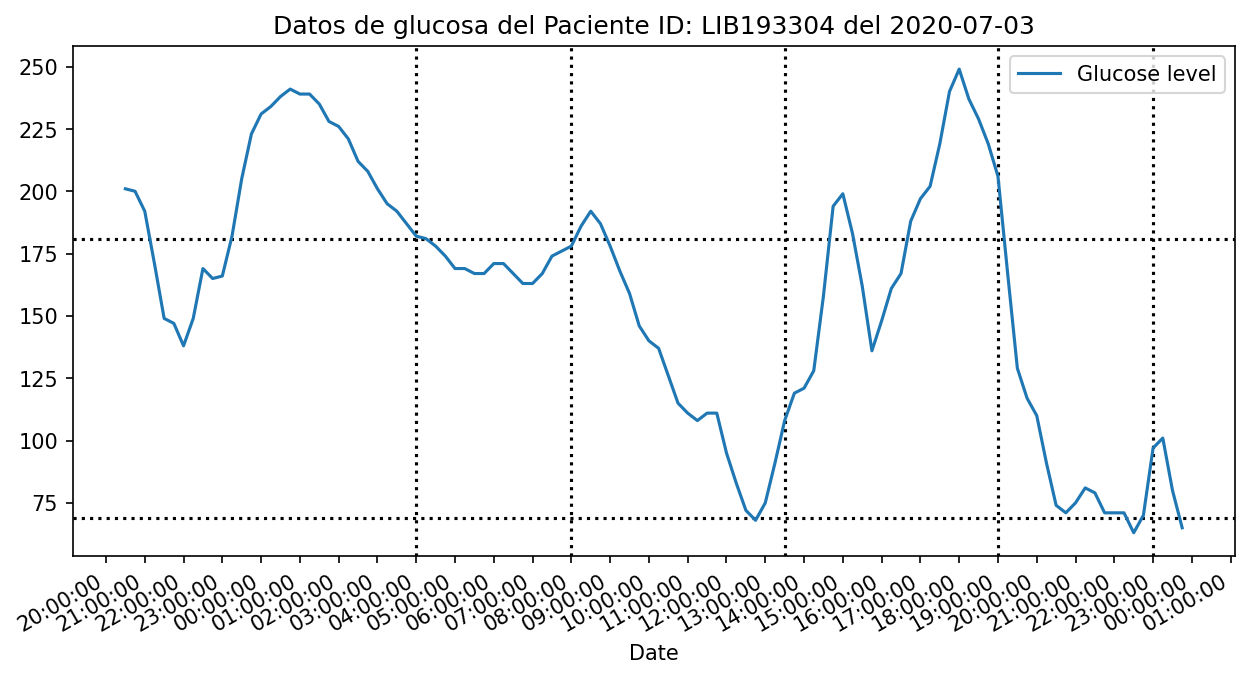

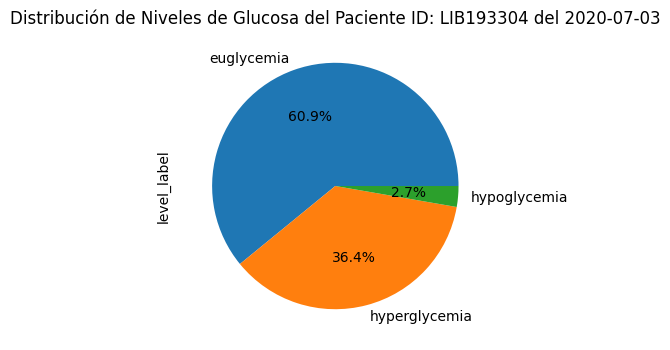

In [96]:
dateObj='2020-07-03'
diasP4.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP4_d2=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [97]:
df_rango.loc[dateObj+' 22:00:00':dateObj+' 23:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-07-03 22:00:00,71.0,22,0,5,0,euglycemia
2020-07-03 22:15:00,71.0,22,15,5,0,euglycemia
2020-07-03 22:30:00,63.0,22,30,5,-1,hypoglycemia
2020-07-03 22:45:00,70.0,22,45,5,0,euglycemia
2020-07-03 23:00:00,97.0,23,0,5,0,euglycemia


In [98]:
especialesP4.append('2020-07-03 22:30:00')

### Selección del Dia 3 del Paciente 4: ID: LIB193304

Fecha Inicio Previo  : 2020-06-17 20:30:00
Rango Inicio Objetivo: 2020-06-18 04:00:00
Rango Fin Objetivo   : 2020-06-18 23:59:59


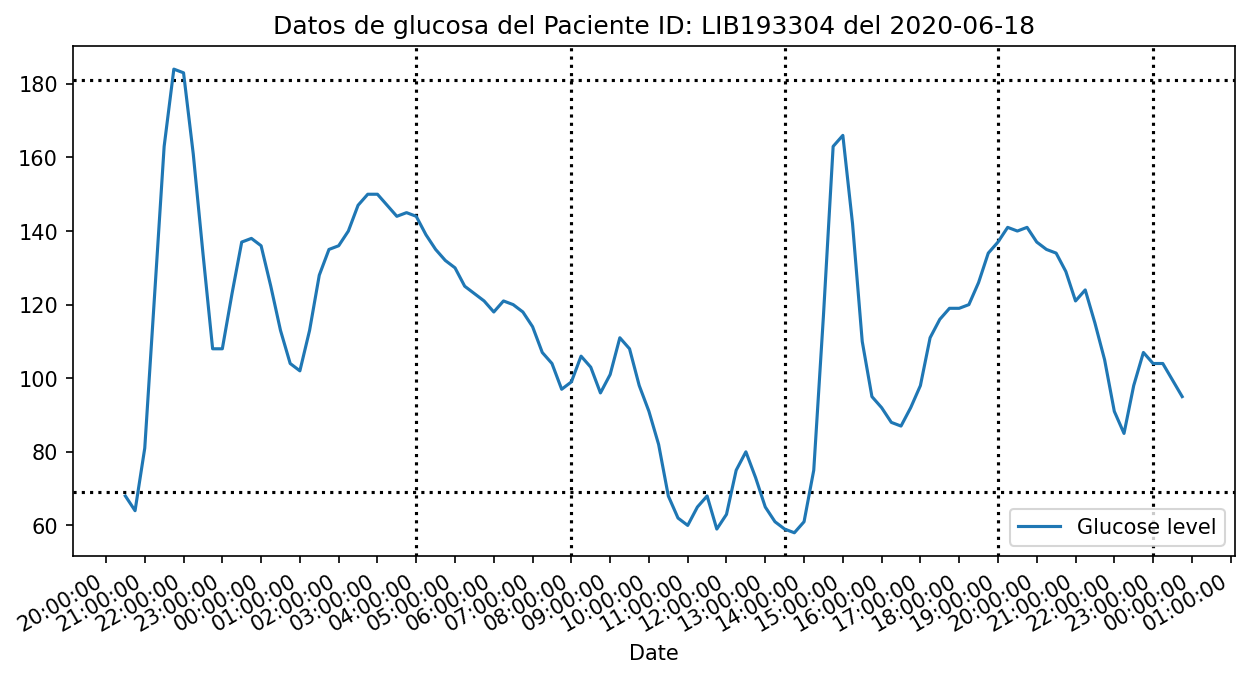

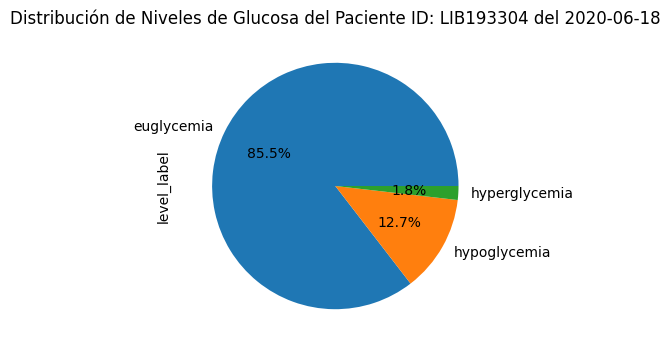

In [99]:
dateObj='2020-06-18'
diasP4.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP4_d3=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [100]:
df_rango.loc[dateObj+' 10:00:00':dateObj+' 11:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-06-18 10:00:00,91.0,10,0,2,0,euglycemia
2020-06-18 10:15:00,82.0,10,15,2,0,euglycemia
2020-06-18 10:30:00,68.0,10,30,2,-1,hypoglycemia
2020-06-18 10:45:00,62.0,10,45,2,-1,hypoglycemia
2020-06-18 11:00:00,60.0,11,0,2,-1,hypoglycemia


In [101]:
especialesP4.append('2020-06-18 10:30:00')

### Selección del Dia 4 del Paciente 4: ID: LIB193304

Fecha Inicio Previo  : 2020-06-20 20:30:00
Rango Inicio Objetivo: 2020-06-21 04:00:00
Rango Fin Objetivo   : 2020-06-21 23:59:59


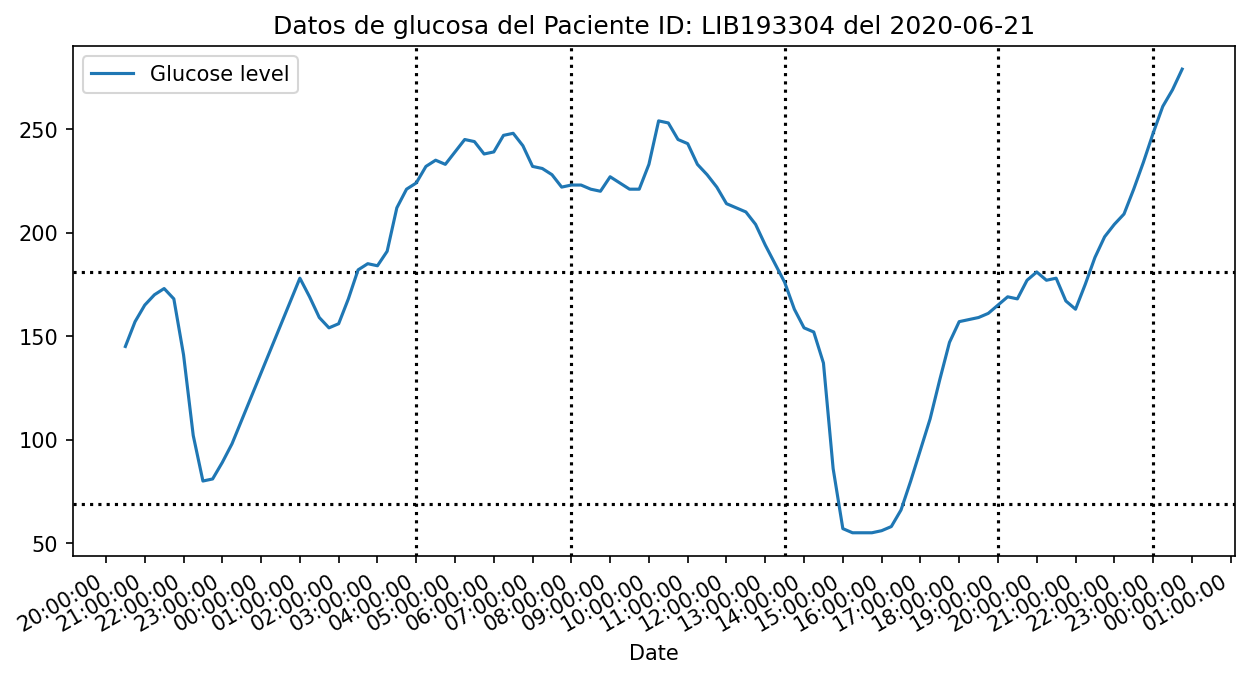

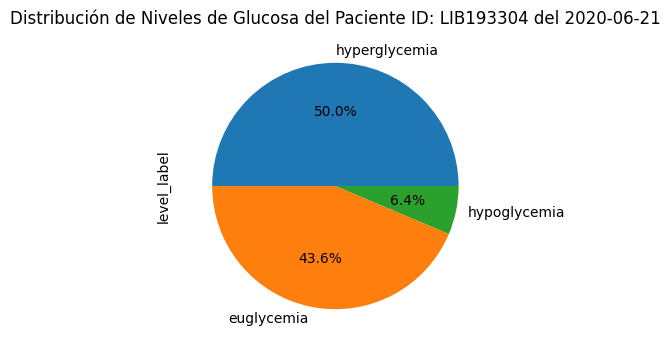

In [102]:
dateObj='2020-06-21'
diasP4.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGenPaciente.loc[DateObjStart:ObjRangeDateEnd]
utils.plotDayPatient(df_rango,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)
df_rango['level_label'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
dfP4_d4=dfGenPacienteScaled.loc[DateObjStart:ObjRangeDateEnd].copy()

### Agregamos eventos especiales de hipoglucemia

In [103]:
df_rango.loc[dateObj+' 14:00:00':dateObj+' 15:00:00']

,Glucose level,hour,min,pod_id,level_id,level_label
Date,,,,,,
2020-06-21 14:00:00,154.0,14,0,3,0,euglycemia
2020-06-21 14:15:00,152.0,14,15,3,0,euglycemia
2020-06-21 14:30:00,137.0,14,30,3,0,euglycemia
2020-06-21 14:45:00,86.0,14,45,3,0,euglycemia
2020-06-21 15:00:00,57.0,15,0,3,-1,hypoglycemia


In [104]:
especialesP4.append('2020-06-21 15:00:00')

In [105]:
diasP4

['2020-06-16', '2020-07-03', '2020-06-18', '2020-06-21']

In [106]:
especialesP4

['2020-06-16 15:30:00',
 '2020-07-03 22:30:00',
 '2020-06-18 10:30:00',
 '2020-06-21 15:00:00']

## Unimos los dataset de los 4 dias seleccionados de cada paciente

In [107]:
dfP1 = pd.concat([dfP1_d1,dfP1_d2,dfP1_d3,dfP1_d4])
dfP2 = pd.concat([dfP2_d1,dfP2_d2,dfP2_d3,dfP2_d4])
dfP3 = pd.concat([dfP3_d1,dfP3_d2,dfP3_d3,dfP3_d4])
dfP4 = pd.concat([dfP4_d1,dfP4_d2,dfP4_d3,dfP4_d4])

## Prueba de recolección de los valores a predecir a las 4am

Hay que recordar que solo necesitamos 30 muestras hacia atras del objetivo, es decir 30*15min=450min o 7.5 horas antes

In [108]:
hora=' 04:00:00'
DateObj=diasP1[0]+hora
print(DateObj)
DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
print(DateObjStart)
df_rango=dfP1.loc[DateObjStart:DateObj]
print(len(df_rango))

2020-10-16 04:00:00
2020-10-15 20:30:00
31


In [109]:
df_rango

,Glucose level,hour,min,pod_id,level_id
Date,,,,,
2020-10-15 20:30:00,0.160870,0.869565,0.508475,0.6,0.5
2020-10-15 20:45:00,0.147826,0.869565,0.762712,0.6,0.5
2020-10-15 21:00:00,0.089130,0.913043,0.000000,0.8,0.5
2020-10-15 21:15:00,0.045652,0.913043,0.254237,0.8,0.0
2020-10-15 21:30:00,0.073913,0.913043,0.508475,0.8,0.5
2020-10-15 21:45:00,0.169565,0.913043,0.762712,0.8,0.5
2020-10-15 22:00:00,0.332609,0.956522,0.000000,0.8,1.0
2020-10-15 22:15:00,0.423913,0.956522,0.254237,0.8,1.0
2020-10-15 22:30:00,0.443478,0.956522,0.508475,0.8,1.0


## Probamos como se ven los datos que debe generar para entrenamiento

In [110]:
select_data=df_rango.to_numpy()
X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)

In [111]:
X

array([[[0.16086957, 0.86956522, 0.50847458, 0.6       , 0.5       ],
        [0.14782609, 0.86956522, 0.76271186, 0.6       , 0.5       ],
        [0.08913043, 0.91304348, 0.        , 0.8       , 0.5       ],
        [0.04565217, 0.91304348, 0.25423729, 0.8       , 0.        ],
        [0.07391304, 0.91304348, 0.50847458, 0.8       , 0.5       ],
        [0.16956522, 0.91304348, 0.76271186, 0.8       , 0.5       ],
        [0.3326087 , 0.95652174, 0.        , 0.8       , 1.        ],
        [0.42391304, 0.95652174, 0.25423729, 0.8       , 1.        ],
        [0.44347826, 0.95652174, 0.50847458, 0.8       , 1.        ],
        [0.37391304, 0.95652174, 0.76271186, 0.8       , 1.        ],
        [0.28913043, 1.        , 0.        , 0.8       , 0.5       ],
        [0.24782609, 1.        , 0.25423729, 0.8       , 0.5       ],
        [0.28478261, 1.        , 0.50847458, 0.8       , 0.5       ],
        [0.30869565, 1.        , 0.76271186, 0.8       , 1.        ],
        [0.29130435,

In [112]:
Y

array([[0.09565217]])

## Recolección de los eventos de forma automática

In [113]:
gen_X=np.reshape([], (0, lag, len(featuresObj)))
gen_Y=np.reshape([], (0,1))
print(gen_X.shape)
print(gen_Y.shape)

(0, 30, 5)
(0, 1)


### Recolección de Eventos fijos

In [114]:
gen_XP1=np.reshape([], (0, lag, len(featuresObj)))
gen_YP1=np.reshape([], (0,1))

gen_XP2=np.reshape([], (0, lag, len(featuresObj)))
gen_YP2=np.reshape([], (0,1))

gen_XP3=np.reshape([], (0, lag, len(featuresObj)))
gen_YP3=np.reshape([], (0,1))

gen_XP4=np.reshape([], (0, lag, len(featuresObj)))
gen_YP4=np.reshape([], (0,1))

eventosFijos=[' 04:00:00',' 08:00:00',' 13:30:00',' 19:00:00',' 23:00:00']

eventosP1=[]
eventosP2=[]
eventosP3=[]
eventosP4=[]
for evento in eventosFijos:
    print('Paciente 1')
    for dia in diasP1: 
        DateObj=dia+evento
        print(DateObj)
        eventosP1.append(DateObj)        
        DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
        df_rango=dfP1.loc[DateObjStart:DateObj]
        select_data=df_rango.to_numpy()
        X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
        gen_XP1=np.concatenate((gen_XP1,X))
        gen_YP1=np.concatenate((gen_YP1,Y)) 
    
    print('Paciente 2')
    for dia in diasP2: 
        DateObj=dia+evento
        print(DateObj)
        eventosP2.append(DateObj)       
        DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
        df_rango=dfP2.loc[DateObjStart:DateObj]
        select_data=df_rango.to_numpy()
        X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
        gen_XP2=np.concatenate((gen_XP2,X))
        gen_YP2=np.concatenate((gen_YP2,Y)) 
    
    print('Paciente 3')
    for dia in diasP3: 
        DateObj=dia+evento
        print(DateObj)
        eventosP3.append(DateObj)       
        DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
        df_rango=dfP3.loc[DateObjStart:DateObj]
        select_data=df_rango.to_numpy()
        X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
        gen_XP3=np.concatenate((gen_XP3,X))
        gen_YP3=np.concatenate((gen_YP3,Y)) 
    
    print('Paciente 4')
    for dia in diasP4: 
        DateObj=dia+evento
        print(DateObj)
        eventosP4.append(DateObj)       
        DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
        df_rango=dfP4.loc[DateObjStart:DateObj]
        select_data=df_rango.to_numpy()
        X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
        gen_XP4=np.concatenate((gen_XP4,X))
        gen_YP4=np.concatenate((gen_YP4,Y)) 
        
print(len(gen_XP1))
print(len(gen_YP1))

print(len(gen_XP2))
print(len(gen_YP2))
print(len(gen_XP3))
print(len(gen_YP3))       

print(len(gen_XP4))
print(len(gen_YP4))

Paciente 1
2020-10-16 04:00:00
2020-10-3 04:00:00
2020-10-10 04:00:00
2020-10-12 04:00:00
Paciente 2
2020-09-29 04:00:00
2020-10-11 04:00:00
2020-10-13 04:00:00
2020-10-15 04:00:00
Paciente 3
2021-03-12 04:00:00
2021-05-20 04:00:00
2021-03-14 04:00:00
2021-03-20 04:00:00
Paciente 4
2020-06-16 04:00:00
2020-07-03 04:00:00
2020-06-18 04:00:00
2020-06-21 04:00:00
Paciente 1
2020-10-16 08:00:00
2020-10-3 08:00:00
2020-10-10 08:00:00
2020-10-12 08:00:00
Paciente 2
2020-09-29 08:00:00
2020-10-11 08:00:00
2020-10-13 08:00:00
2020-10-15 08:00:00
Paciente 3
2021-03-12 08:00:00
2021-05-20 08:00:00
2021-03-14 08:00:00
2021-03-20 08:00:00
Paciente 4
2020-06-16 08:00:00
2020-07-03 08:00:00
2020-06-18 08:00:00
2020-06-21 08:00:00
Paciente 1
2020-10-16 13:30:00
2020-10-3 13:30:00
2020-10-10 13:30:00
2020-10-12 13:30:00
Paciente 2
2020-09-29 13:30:00
2020-10-11 13:30:00
2020-10-13 13:30:00
2020-10-15 13:30:00
Paciente 3
2021-03-12 13:30:00
2021-05-20 13:30:00
2021-03-14 13:30:00
2021-03-20 13:30:00
Pa

In [115]:
gen_X=np.concatenate((gen_XP1,gen_XP2,gen_XP3,gen_XP4))

In [116]:
gen_X.shape

(80, 30, 5)

In [117]:
gen_Y=np.concatenate((gen_YP1,gen_YP2,gen_YP3,gen_YP4))

In [118]:
gen_Y.shape

(80, 1)

In [119]:
dfResult=pd.DataFrame(scalerGlucosa.inverse_transform(gen_Y),columns=['Glucose level'])
dfResult['Nivel'] = dfResult['Glucose level'].apply(utils.label_LevelBG)   
dfResult

,Glucose level,Nivel
0,84.0,euglycemia
1,191.0,hyperglycemia
2,199.0,hyperglycemia
3,80.0,euglycemia
4,99.0,euglycemia
...,...,...
75,165.0,euglycemia
76,99.0,euglycemia
77,97.0,euglycemia
78,104.0,euglycemia


In [120]:
dfResult['Nivel'].value_counts()

euglycemia       47
hyperglycemia    23
hypoglycemia     10
Name: Nivel, dtype: int64

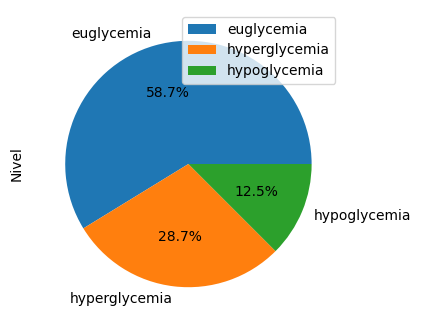

In [121]:
dfResult['Nivel'].value_counts().plot.pie(y='level_label',legend=True,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [122]:
print('Paciente 1')
for evento in especialesP1:    
    DateObj=evento
    print(DateObj)
    eventosP1.append(DateObj)       
    DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
    df_rango=dfP1.loc[DateObjStart:DateObj]
    select_data=df_rango.to_numpy()
    X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
    gen_XP1=np.concatenate((gen_XP1,X))
    gen_YP1=np.concatenate((gen_YP1,Y)) 
    
print('Paciente 2')
for evento in especialesP2:    
    DateObj=evento
    print(DateObj)
    eventosP2.append(DateObj)       
    DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
    df_rango=dfP2.loc[DateObjStart:DateObj]
    select_data=df_rango.to_numpy()
    X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
    gen_XP2=np.concatenate((gen_XP2,X))
    gen_YP2=np.concatenate((gen_YP2,Y))
     
print('Paciente 3')
for evento in especialesP3:    
    DateObj=evento
    print(DateObj)
    eventosP3.append(DateObj)       
    DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
    df_rango=dfP3.loc[DateObjStart:DateObj]
    select_data=df_rango.to_numpy()
    X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
    gen_XP3=np.concatenate((gen_XP3,X))
    gen_YP3=np.concatenate((gen_YP3,Y)) 
 
    
print('Paciente 4')
for evento in especialesP4:    
    DateObj=evento
    print(DateObj)
    eventosP4.append(DateObj)       
    DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
    df_rango=dfP4.loc[DateObjStart:DateObj]
    select_data=df_rango.to_numpy()
    X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)
    gen_XP4=np.concatenate((gen_XP4,X))
    gen_YP4=np.concatenate((gen_YP4,Y)) 
    
print(len(gen_XP1))
print(len(gen_YP1))

print(len(gen_XP2))
print(len(gen_YP2))
print(len(gen_XP3))
print(len(gen_YP3))       

print(len(gen_XP4))
print(len(gen_YP4))

Paciente 1
2020-10-16 17:45:00
2020-10-03 21:00:00
2020-10-10 19:45:00
2020-10-12 06:30:00
Paciente 2
2020-09-29 14:30:00
2020-10-11 14:00:00
2020-10-13 14:15:00
2020-10-15 18:00:00
Paciente 3
2021-03-12 22:00:00
2021-05-20 13:00:00
2021-03-14 11:30:00
2021-03-20 10:45:00
Paciente 4
2020-06-16 15:30:00
2020-07-03 22:30:00
2020-06-18 10:30:00
2020-06-21 15:00:00
24
24
24
24
24
24
24
24


In [123]:
gen_Y_Especiales=np.concatenate((gen_YP1,gen_YP2,gen_YP3,gen_YP4))

In [124]:
gen_Y_Especiales.shape

(96, 1)

In [125]:
genT_Total=np.concatenate((gen_Y,gen_Y_Especiales))

In [126]:
genT_Total.shape

(176, 1)

In [127]:
dfResult=pd.DataFrame(scalerGlucosa.inverse_transform(genT_Total),columns=['Glucose level'])
dfResult['Nivel'] = dfResult['Glucose level'].apply(utils.label_LevelBG)   
dfResult['Nivel'].value_counts()

euglycemia       95
hyperglycemia    46
hypoglycemia     35
Name: Nivel, dtype: int64

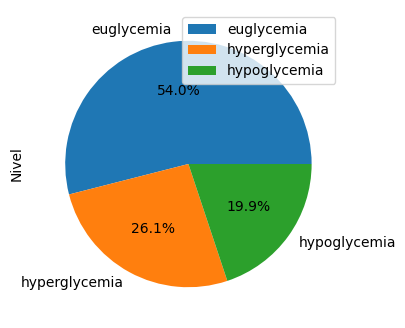

In [128]:
dfResult['Nivel'].value_counts().plot.pie(y='level_label',legend=True,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [221]:
dump(eventosP1, open('dataset/generado/paciente1/eventos.list', 'wb'))
print(len(eventosP1))

24


In [222]:
dump(eventosP2, open('dataset/generado/paciente2/eventos.list', 'wb'))
print(len(eventosP2))

24


In [223]:
dump(eventosP3, open('dataset/generado/paciente3/eventos.list', 'wb'))
print(len(eventosP3))

24


In [224]:
dump(eventosP4, open('dataset/generado/paciente4/eventos.list', 'wb'))
print(len(eventosP4))

24
